In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
import shap
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis
import numpy as np
import seaborn as sns
# Load the dataset
df = pd.read_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/RMClassification.csv")
# Prepare the data
X = df.iloc[:, 0:2]  # Independent variables
y = df.iloc[:, 2]    # Dependent variable

In [2]:
# Calculate standard deviation of the target variable (y)
std_deviation_y = round(np.std(y), 2)
# Print the results
print("Standard Deviation of the target variable (y):", std_deviation_y)

Standard Deviation of the target variable (y): 15.13


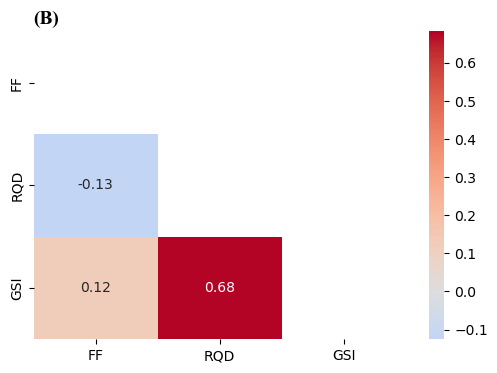

In [3]:
# Calculate the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(6,4))
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Create a correlation plot using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
# Define the font properties
font_properties = {'family': 'Times New Roman', 'weight': 'bold', 'size': 14}
# Set the title with the defined font properties
plt.title('(B)', fontdict=font_properties, loc='left')
plt.show()

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Save training and testing datasets to CSV files
#X_train.to_csv("TrainingSet.csv", index=False)
#X_test.to_csv("TestingSet.csv", index=False)
#y_train.to_csv("TrainingLabels.csv", index=False)
#y_test.to_csv("TestingLabels.csv", index=False)
# Combine X_train and y_train into one DataFrame
train_df = pd.concat([X_train, pd.DataFrame({'GSI': y_train})], axis=1)
# Save the combined training dataset to a CSV file
train_df.to_csv("CombinedTrainingSet.csv", index=False)
# Combine X_test and y_test into one DataFrame
test_df = pd.concat([X_test, pd.DataFrame({'GSI': y_test})], axis=1)
# Save the combined testing dataset to a CSV file
test_df.to_csv("CombinedTestingSet.csv", index=False)

In [5]:
# Display statistical summary for training set features and target
print("Training set summary:")
training_summary = pd.concat([X_train.describe(), y_train.describe()], axis=1)
print(training_summary)
print("")
# Display statistical summary for testing set features and target
print("Testing set summary:")
testing_summary = pd.concat([X_test.describe(), y_test.describe()], axis=1)
print(testing_summary)
# Include counts in the summaries
training_summary['count'] = X_train.count()
testing_summary['count'] = X_test.count()
# Concatenate both tables and save to CSV
combined_summary = pd.concat([training_summary, testing_summary], keys=['Training', 'Testing'])
combined_summary.to_csv('TrainTestSummary.csv')

Training set summary:
                 FF           RQD           GSI
count  52197.000000  52197.000000  52197.000000
mean      16.448606     49.884418     57.007411
std       11.168779     30.177864     15.143549
min        0.000000      0.100000      3.800000
25%        7.000000     20.000000     47.800000
50%       13.500000     50.000000     59.000000
75%       26.000000     77.000000     70.500000
max       44.000000    100.000000     93.000000

Testing set summary:
                 FF           RQD           GSI
count  13050.000000  13050.000000  13050.000000
mean      16.379252     49.913384     56.932910
std       11.111035     30.086525     15.079162
min        0.000000      0.200000      9.000000
25%        7.000000     21.000000     47.900000
50%       13.350000     50.000000     58.800000
75%       26.000000     76.450000     70.000000
max       44.000000    100.000000     90.000000


invalid value encountered in cast


In [6]:
import xgboost as xgb

Correlation coefficient for feature: 0.98
Standard Deviation: 15.14
Correlation coefficient for feature: 0.97
Standard Deviation: 15.08


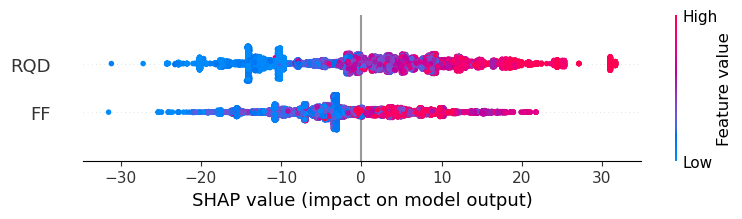

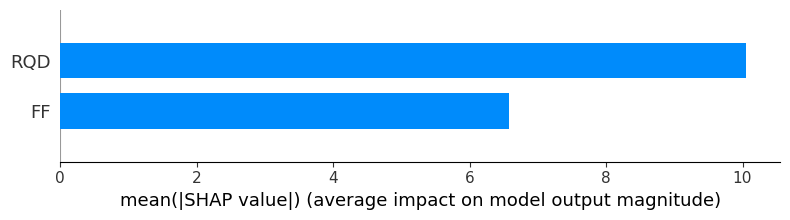

Mean SHAP Values: [-1.8689926  1.8221214]


In [7]:
# Create an XGBoost regressor
xg_reg = xgb.XGBRegressor(learning_rate= 0.5, max_depth= 10, n_estimators= 500, min_child_weight= 4, subsample=0.6)
# Fit the model to the training set
xg_reg.fit(X_train, y_train)
# Make predictions on the training set
y_pred = xg_reg.predict(X_train)
y_pred_test = xg_reg.predict(X_test)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_train)
print(f'Standard Deviation: {round(std_dev, 2)}')
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_test)
print(f'Standard Deviation: {round(std_dev, 2)}')
# SHAP values
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.show()
# Bar plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", show=False)
plt.show()
# Mean SHAP values
mean_shap_values = shap_values.mean(axis=0)
print('Mean SHAP Values:', mean_shap_values)

In [8]:
# Calculate the mean squared error
mse = np.mean((y_train - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_train, y_pred):
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100
mape = calculate_mape(y_train, y_pred.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred, y_train):
    rmse = np.sqrt(np.mean((y_pred.flatten() - y_train)**2))
    target_range = np.max(y_train) - np.min(y_train)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred, y_train)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('XGBTrain.xlsx', index=False)

Mean Squared Error (MSE): 9.50
Root Mean Squared Error: 3.08
Mean Absolute Error (MAE): 1.60
Mean Absolute Percentage Error (MAPE): 3.48%
Root Mean Squared Error (RMSE): 3.08
Relative Root Mean Squared Error (RRMSE): 0.03
R-squared (R²): 0.96
Correlation coefficient for feature: 0.98
Standard Deviation: 14.84
Performance Index (Pi): 0.02


In [9]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_train, 'Predicted_Target': y_pred})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/XGBPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: XGBPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: XGBPred_vs_actual.csv


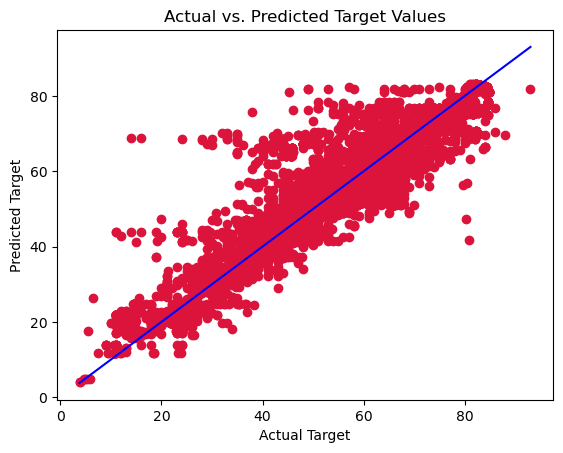

In [10]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [11]:
# Calculate the mean squared error
mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_test, y_pred_test):
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mape = calculate_mape(y_test, y_pred_test.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred_test, y_test):
    rmse = np.sqrt(np.mean((y_pred_test.flatten() - y_test)**2))
    target_range = np.max(y_test) - np.min(y_test)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred_test, y_test)
print(f"RRMSE: {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred_test)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('XGBTest.xlsx', index=False)

Mean Squared Error (MSE): 12.48
Root Mean Squared Error: 3.53
Mean Absolute Error (MAE): 1.77
Mean Absolute Percentage Error (MAPE): 3.81%
Root Mean Squared Error (RMSE): 3.53
RRMSE: 0.04
R-squared (R²): 0.95
Correlation coefficient for feature: 0.97
Standard Deviation: 14.81
Performance Index (Pi): 0.02


In [12]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_test, 'Predicted_Target': y_pred_test})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/XGBTestPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: XGBTestPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: XGBTestPred_vs_actual.csv


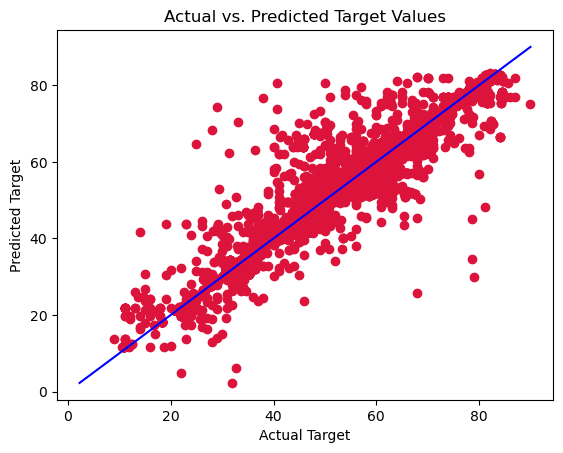

In [13]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test, c='crimson')
p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [14]:
# Load new or unknown data for prediction
VDdata = pd.read_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/AIO_Validation.csv")  # Replace with the path to your new data file
# Prepare the new data
VDX = VDdata.iloc[:, 0:2]  # Assuming the same number of features as in the training data
yD = VDdata.iloc[:, 2] 
# Predict using the trained model
YpredVD = xg_reg.predict(VDX)
# Calculate RMR89 using the formula: RMR89 = GSI_pred + 5
RMR89 = YpredVD + 5
# Calculate QS using the formula: QS = EXP((RMR89 - 44) / 9)
QS = [math.exp((val - 44) / 9) for val in RMR89]
# Add the calculated values and predicted GSI to the dataframe
VDdata['Predicted_GSI'] = YpredVD
VDdata['RMR89'] = RMR89
VDdata['QS'] = QS
# Save the updated dataframe to a new CSV file
VDdata.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/XGB_ValidationKoBold.csv", index=False)
# Print or use the updated dataframe as needed
#print("Updated dataframe with Predicted GSI, RMR89, and QS values:")
#print(VDdata)
# Calculate standard deviation of the target variable (y)
std_deviation_y = round(np.std(yD), 2)
# Print the results
print("Standard Deviation of the target variable (yD):", std_deviation_y)

Standard Deviation of the target variable (yD): 8.29


In [15]:
# Calculate the mean squared error
mse = np.mean((yD - YpredVD) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yD, YpredVD)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(yD, YpredVD):
    return np.mean(np.abs((yD - YpredVD) / yD)) * 100
mape = calculate_mape(yD, YpredVD.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(yD, YpredVD))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(YpredVD, yD):
    rmse = np.sqrt(np.mean((YpredVD - yD)**2))
    target_range = np.max(yD) - np.min(yD)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(YpredVD, yD)
print(f"Relative RMSE: {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(yD, YpredVD)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(yD, YpredVD, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
    #Calculate standard deviations for each column of y
STD = np.std(YpredVD)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.4f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Validate_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Validate_df.to_excel('XGBValidation.xlsx', index=False)

Mean Squared Error (MSE): 53.0207
Mean Absolute Error (MAE): 5.1703
Mean Absolute Percentage Error (MAPE): 9.00%
Root Mean Squared Error (RMSE): 7.2815
Relative RMSE: 0.17
R-squared (R²): 0.23
Correlation coefficient for feature: 0.70
Standard Deviation: 9.5689
Performance Index (Pi): 0.10


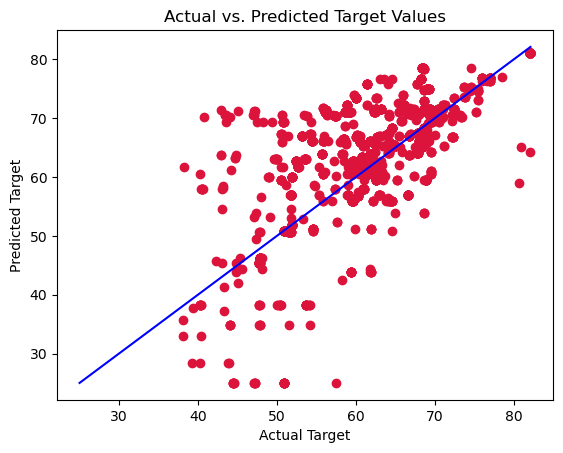

In [16]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(yD, YpredVD, c='crimson')
p1 = max(max(YpredVD), max(yD))
p2 = min(min(YpredVD), min(yD))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [17]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': yD, 'Predicted_Target': YpredVD})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/VDXGBPred_vs_actual.csv", index=False)

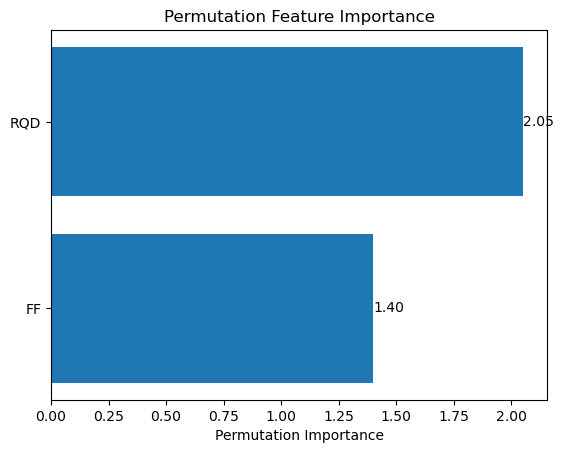

In [18]:
from sklearn.inspection import permutation_importance
# Calculate permutation feature importance
result = permutation_importance(xg_reg, X_test, y_test, n_repeats=30, random_state=42)
# Get the feature importances
importances = result.importances_mean
# Sort features based on importance
sorted_idx = importances.argsort()
# Plot feature importances
plt.barh(range(X_test.shape[1]), importances[sorted_idx], align="center")
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
# Label each bar with its maximum importance value rounded to two decimal places
for i, val in zip(range(X_test.shape[1]), importances[sorted_idx]):
    plt.text(val, i, f'{val:.2f}', ha='left', va='center')
plt.show()

In [23]:
import numpy as np
def median_absolute_percentage_error(y_test, y_pred_test):
    absolute_percentage_errors = np.abs((y_test - y_pred_test) / y_test) * 100
    MdAPE = np.median(absolute_percentage_errors)
    return MdAPE
# Assuming y_test and y_pred are defined somewhere before this code
# Replace y_test and y_pred with the actual variables you have in your code
percentiles_to_calculate = [1, 5, 10, 25,50, 75, 90, 95, 100]
for percentile in percentiles_to_calculate:
    # Calculate the specified percentile for y_true
    y_true_percentile = np.percentile(y_test, percentile)
    # Calculate the specified percentile for y_pred
    y_pred_percentile = np.percentile(y_pred_test, percentile)
    # Calculate MdAPE at the specified percentile
    MdAPE_percentile = median_absolute_percentage_error(y_true_percentile, y_pred_percentile)
    print(f'MdAPE at {percentile}th percentile: {MdAPE_percentile:.2f}%')

MdAPE at 1th percentile: 2.30%
MdAPE at 5th percentile: 3.73%
MdAPE at 10th percentile: 5.10%
MdAPE at 25th percentile: 0.55%
MdAPE at 50th percentile: 1.53%
MdAPE at 75th percentile: 2.11%
MdAPE at 90th percentile: 0.03%
MdAPE at 95th percentile: 0.76%
MdAPE at 100th percentile: 7.55%


In [18]:
from catboost import CatBoostRegressor, Pool

Correlation coefficient for feature: 0.98
Standard Deviation: 15.1434
Correlation coefficient for feature: 0.97
Standard Deviation: 15.08


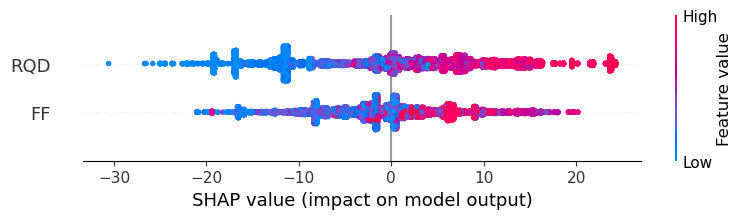

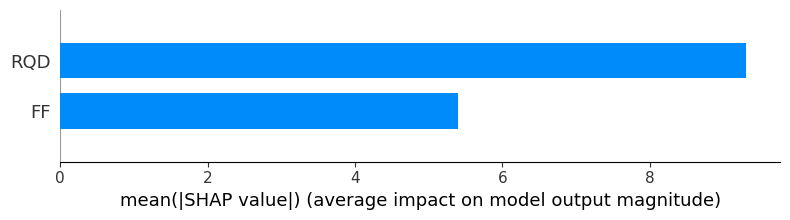

Mean SHAP Values: [-0.50002133  0.4057149 ]


In [19]:
# Create a CatBoost regressor
cat_reg = CatBoostRegressor(colsample_bylevel=1.0, depth=9, iterations=1000, l2_leaf_reg=3.0, learning_rate= 0.2, subsample= 1.0)
# Fit the model to the training set
train_pool = Pool(X_train, label=y_train)
cat_reg.fit(train_pool, verbose=False)
# Make predictions on the test set
y_pred = cat_reg.predict(X_train)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_train)
print(f'Standard Deviation: {round(std_dev, 4)}')
# Use the best model for predictions
y_pred_test = cat_reg.predict(X_test)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_test)
print(f'Standard Deviation: {round(std_dev, 2)}')
# SHAP values
explainer = shap.Explainer(cat_reg)
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.show()
# Bar plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", show=False)
plt.show()
# Mean SHAP values
mean_shap_values = shap_values.mean(axis=0)
print('Mean SHAP Values:', mean_shap_values)

In [20]:
# Calculate the mean squared error
mse = np.mean((y_train - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_train, y_pred):
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100
mape = calculate_mape(y_train, y_pred.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Relative root mean squared error(RRMSE)
def relative_rmse(y_pred, y_train):
    rmse = np.sqrt(np.mean((y_pred.flatten() - y_train)**2))
    target_range = np.max(y_train) - np.min(y_train)
    rrmse = rmse / target_range
    return rrmse
# Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred, y_train)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
# Calculate standard deviations for each column of y
STD = np.std(y_pred)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('CATTrain.xlsx', index=False)

Mean Squared Error (MSE): 9.19
Root Mean Squared Error: 3.03
Mean Absolute Error (MAE): 1.68
Mean Absolute Percentage Error (MAPE): 3.62%
Root Mean Squared Error (RMSE): 3.03
Relative Root Mean Squared Error (RRMSE): 0.03
R-squared (R²): 0.96
Correlation coefficient for feature: 0.98
Standard Deviation: 14.76
Performance Index (Pi): 0.02


In [21]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_train, 'Predicted_Target': y_pred})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/CATPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: CATPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: CATPred_vs_actual.csv


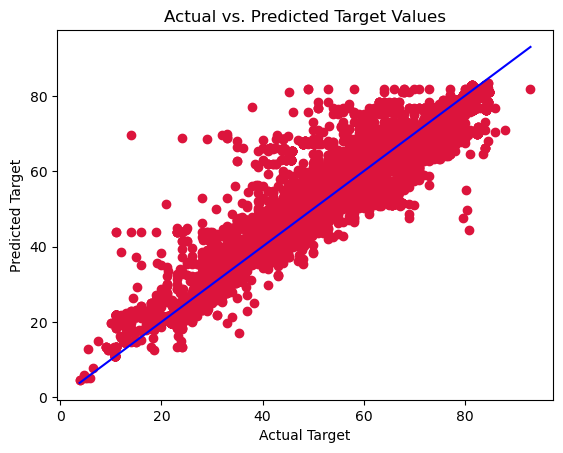

In [22]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [23]:
# Calculate the mean squared error
mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_test, y_pred_test):
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mape = calculate_mape(y_test, y_pred_test.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred_test, y_test):
    rmse = np.sqrt(np.mean((y_pred_test.flatten() - y_test)**2))
    target_range = np.max(y_test) - np.min(y_test)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred_test, y_test)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred_test)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('CATTest.xlsx', index=False)

Mean Squared Error (MSE): 11.48
Root Mean Squared Error: 3.39
Mean Absolute Error (MAE): 1.83
Mean Absolute Percentage Error (MAPE): 3.88%
Root Mean Squared Error (RMSE): 3.39
Relative Root Mean Squared Error (RRMSE): 0.04
R-squared (R²): 0.95
Correlation coefficient for feature: 0.97
Standard Deviation: 14.73
Performance Index (Pi): 0.02


In [24]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_test, 'Predicted_Target': y_pred_test})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/CATTestPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: CATTestPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: CATTestPred_vs_actual.csv


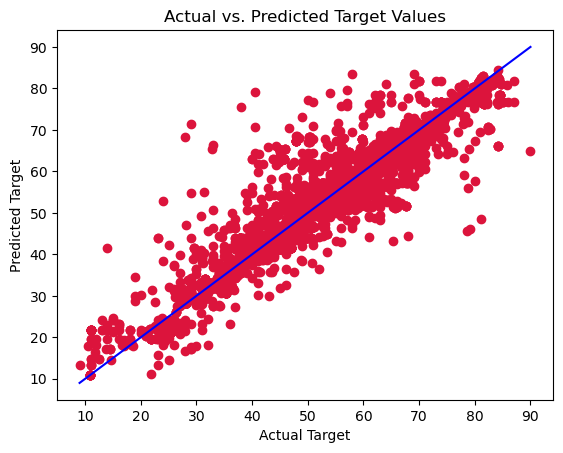

In [25]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test, c='crimson')
p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [26]:
# Load new or unknown data for prediction
VDdata = pd.read_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/AIO_Validation.csv")  # Replace with the path to your new data file
# Prepare the new data
VDX = VDdata.iloc[:, 0:2]  # Assuming the same number of features as in the training data
yD = VDdata.iloc[:, 2] 
# Predict using the trained model
YpredVD = cat_reg.predict(VDX)
# Calculate RMR89 using the formula: RMR89 = GSI_pred + 5
RMR89 = YpredVD + 5
# Calculate QS using the formula: QS = EXP((RMR89 - 44) / 9)
QS = [math.exp((val - 44) / 9) for val in RMR89]
# Add the calculated values and predicted GSI to the dataframe
VDdata['Predicted_GSI'] = YpredVD
VDdata['RMR89'] = RMR89
VDdata['QS'] = QS
# Save the updated dataframe to a new CSV file
VDdata.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/CAT_ValidationKoBold.csv", index=False)
# Print or use the updated dataframe as needed
#print("Updated dataframe with Predicted GSI, RMR89, and QS values:")
#print(VDdata)

In [27]:
# Calculate the mean squared error
mse = np.mean((yD - YpredVD) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yD, YpredVD)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(yD, YpredVD):
    return np.mean(np.abs((yD - YpredVD) / yD)) * 100
mape = calculate_mape(yD, YpredVD.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(yD, YpredVD))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(YpredVD, yD):
    rmse = np.sqrt(np.mean((YpredVD - yD)**2))
    target_range = np.max(yD) - np.min(yD)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(YpredVD, yD)
print(f"Relative RMSE: {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(yD, YpredVD)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(yD, YpredVD, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
    #Calculate standard deviations for each column of y
STD = np.std(YpredVD)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.4f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Validate_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Validate_df.to_excel('CATValidation.xlsx', index=False)

Mean Squared Error (MSE): 26.1354
Mean Absolute Error (MAE): 3.7246
Mean Absolute Percentage Error (MAPE): 6.40%
Root Mean Squared Error (RMSE): 5.1123
Relative RMSE: 0.12
R-squared (R²): 0.62
Correlation coefficient for feature: 0.83
Standard Deviation: 8.9014
Performance Index (Pi): 0.06


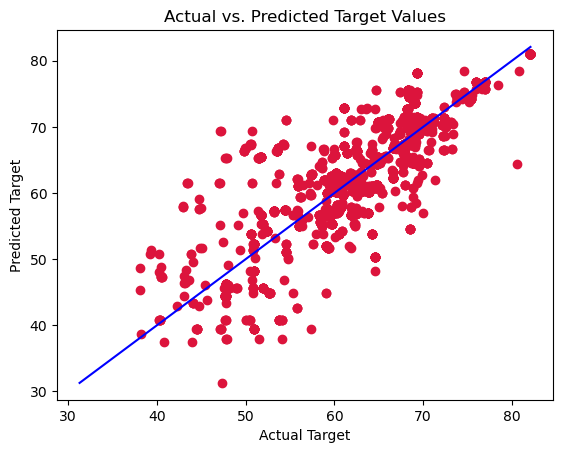

In [28]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(yD, YpredVD, c='crimson')
p1 = max(max(YpredVD), max(yD))
p2 = min(min(YpredVD), min(yD))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [29]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': yD, 'Predicted_Target': YpredVD})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/VDCATPred_vs_actual.csv", index=False)

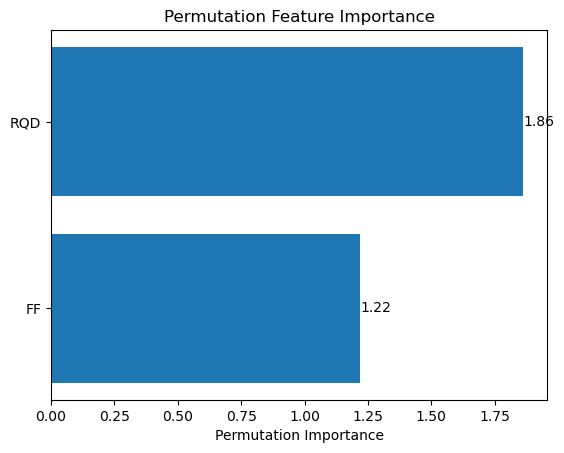

In [30]:
from sklearn.inspection import permutation_importance
# Calculate permutation feature importance
result = permutation_importance(cat_reg, X_test, y_test, n_repeats=30, random_state=42)
# Get the feature importances
importances = result.importances_mean
# Sort features based on importance
sorted_idx = importances.argsort()
# Plot feature importances
plt.barh(range(X_test.shape[1]), importances[sorted_idx], align="center")
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
# Label each bar with its maximum importance value rounded to two decimal places
for i, val in zip(range(X_test.shape[1]), importances[sorted_idx]):
    plt.text(val, i, f'{val:.2f}', ha='left', va='center')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

Correlation coefficient for feature: 0.98
Standard Deviation: 15.08
Correlation coefficient for feature: 0.97
Standard Deviation: 15.08


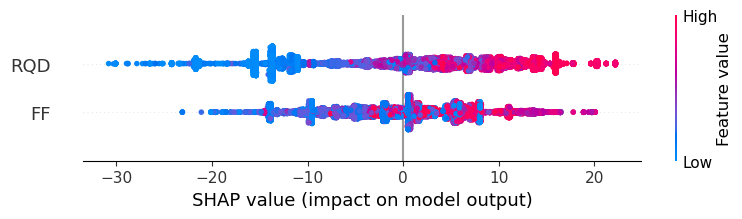

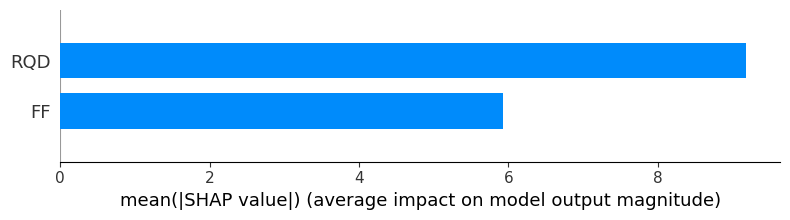

Mean SHAP Values: [-0.26428993  0.19349584]


In [32]:
# Create a Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42, n_jobs=15, max_depth=None, min_samples_leaf=1, max_features='sqrt',min_samples_split=2, n_estimators=300)
# Fit the model to the training set
rf_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_reg.predict(X_train)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_test)
print(f'Standard Deviation: {round(std_dev, 2)}')
# Use the best model for predictions
y_pred_test = rf_reg.predict(X_test)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_test)
print(f'Standard Deviation: {round(std_dev, 2)}')
# SHAP values
explainer = shap.Explainer(rf_reg)
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.show()
# Bar plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", show=False)
plt.show()
# Mean SHAP values
mean_shap_values = shap_values.mean(axis=0)
print('Mean SHAP Values:', mean_shap_values)

In [33]:
# Calculate the mean squared error
mse = np.mean((y_train - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_train, y_pred):
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100
mape = calculate_mape(y_train, y_pred.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred, y_train):
    rmse = np.sqrt(np.mean((y_pred.flatten() - y_train)**2))
    target_range = np.max(y_train) - np.min(y_train)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred, y_train)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('RFRTrain.xlsx', index=False)

Mean Squared Error (MSE): 8.52
Root Mean Squared Error: 2.92
Mean Absolute Error (MAE): 1.52
Mean Absolute Percentage Error (MAPE): 3.31%
Root Mean Squared Error (RMSE): 2.92
Relative Root Mean Squared Error (RRMSE): 0.03
R-squared (R²): 0.96
Correlation coefficient for feature: 0.98
Standard Deviation: 14.82
Performance Index (Pi): 0.02


In [34]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_train, 'Predicted_Target': y_pred})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/RFRPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: RFRPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: RFRPred_vs_actual.csv


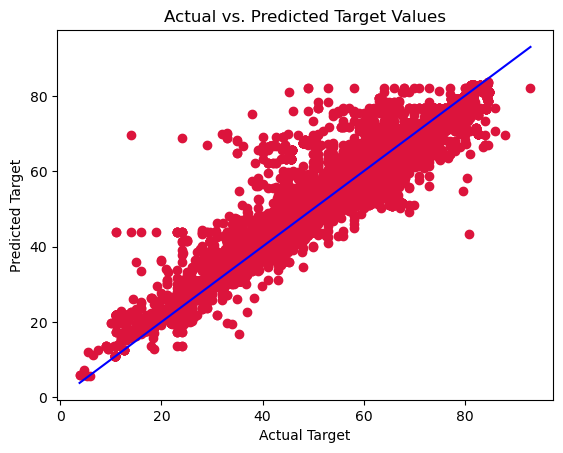

In [35]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [36]:
# Calculate the mean squared error
mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_test, y_pred_test):
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mape = calculate_mape(y_test, y_pred_test.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred_test, y_test):
    rmse = np.sqrt(np.mean((y_pred_test.flatten() - y_test)**2))
    target_range = np.max(y_test) - np.min(y_test)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred_test, y_test)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred_test)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('RFRTest.xlsx', index=False)

Mean Squared Error (MSE): 11.66
Root Mean Squared Error: 3.41
Mean Absolute Error (MAE): 1.73
Mean Absolute Percentage Error (MAPE): 3.73%
Root Mean Squared Error (RMSE): 3.41
Relative Root Mean Squared Error (RRMSE): 0.04
R-squared (R²): 0.95
Correlation coefficient for feature: 0.97
Standard Deviation: 14.78
Performance Index (Pi): 0.02


In [37]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_test, 'Predicted_Target': y_pred_test})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/RFRTestPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: RFRTestPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: RFRTestPred_vs_actual.csv


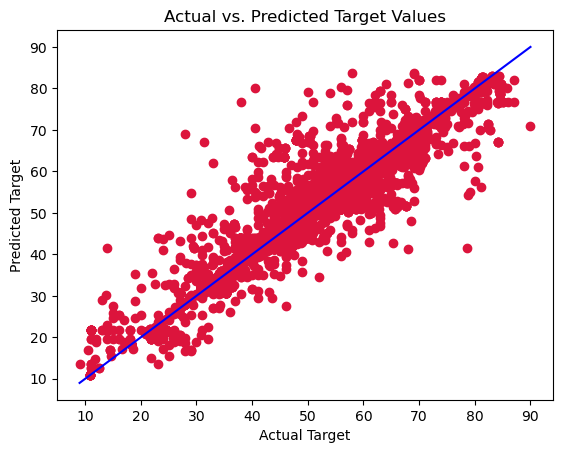

In [38]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test, c='crimson')
p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [39]:
# Load new or unknown data for prediction
VDdata = pd.read_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/AIO_Validation.csv")  # Replace with the path to your new data file
# Prepare the new data
VDX = VDdata.iloc[:, 0:2]  # Assuming the same number of features as in the training data
yD = VDdata.iloc[:, 2] 
# Predict using the trained model
YpredVD = rf_reg.predict(VDX)
# Calculate RMR89 using the formula: RMR89 = GSI_pred + 5
RMR89 = YpredVD + 5
# Calculate QS using the formula: QS = EXP((RMR89 - 44) / 9)
QS = [math.exp((val - 44) / 9) for val in RMR89]
# Add the calculated values and predicted GSI to the dataframe
VDdata['Predicted_GSI'] = YpredVD
VDdata['RMR89'] = RMR89
VDdata['QS'] = QS
# Save the updated dataframe to a new CSV file
VDdata.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/RFR_ValidationKoBold.csv", index=False)
# Print or use the updated dataframe as needed
#print("Updated dataframe with Predicted GSI, RMR89, and QS values:")
#print(VDdata)

In [40]:
# Calculate the mean squared error
mse = np.mean((yD - YpredVD) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yD, YpredVD)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(yD, YpredVD):
    return np.mean(np.abs((yD - YpredVD) / yD)) * 100
mape = calculate_mape(yD, YpredVD.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(yD, YpredVD))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(YpredVD, yD):
    rmse = np.sqrt(np.mean((YpredVD - yD)**2))
    target_range = np.max(yD) - np.min(yD)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(YpredVD, yD)
print(f"Relative RMSE: {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(yD, YpredVD)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(yD, YpredVD, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
    #Calculate standard deviations for each column of y
STD = np.std(YpredVD)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.4f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Validate_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Validate_df.to_excel('RFRValidation.xlsx', index=False)

Mean Squared Error (MSE): 20.6925
Mean Absolute Error (MAE): 3.2953
Mean Absolute Percentage Error (MAPE): 5.68%
Root Mean Squared Error (RMSE): 4.5489
Relative RMSE: 0.10
R-squared (R²): 0.70
Correlation coefficient for feature: 0.86
Standard Deviation: 8.9742
Performance Index (Pi): 0.06


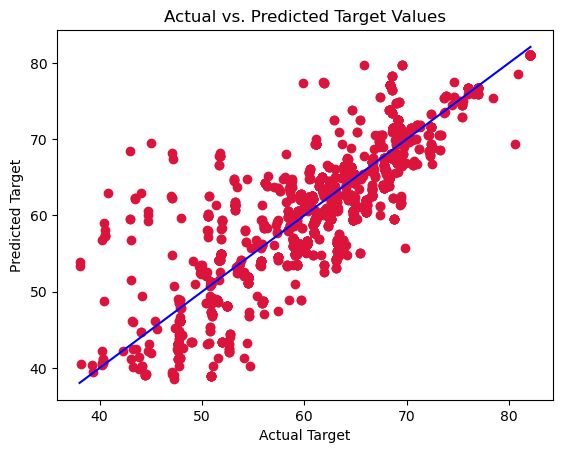

In [41]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(yD, YpredVD, c='crimson')
p1 = max(max(YpredVD), max(yD))
p2 = min(min(YpredVD), min(yD))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

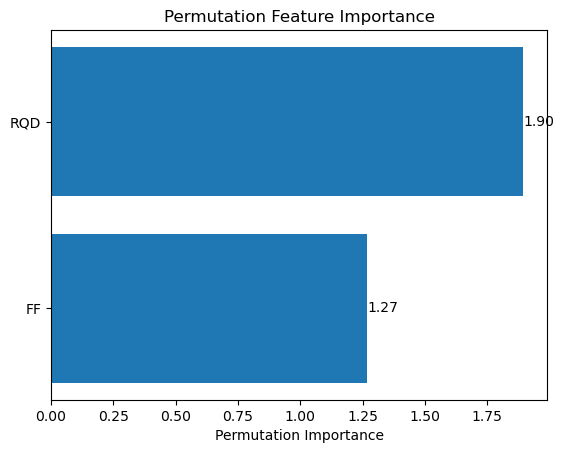

In [42]:
from sklearn.inspection import permutation_importance
# rf_reg.fit(X_train, y_train)
# Calculate permutation feature importance
result = permutation_importance(rf_reg, X_test, y_test, n_repeats=30, random_state=42)
# Get the feature importances
importances = result.importances_mean
# Sort features based on importance
sorted_idx = importances.argsort()
# Plot feature importances
plt.barh(range(X_test.shape[1]), importances[sorted_idx], align="center")
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
# Label each bar with its maximum importance value rounded to two decimal places
for i, val in zip(range(X_test.shape[1]), importances[sorted_idx]):
    plt.text(val, i, f'{val:.2f}', ha='left', va='center')
plt.show()

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

Correlation coefficient for feature: 0.98
Standard Deviation: 15.08
Correlation coefficient for feature: 0.97
Standard Deviation: 15.08


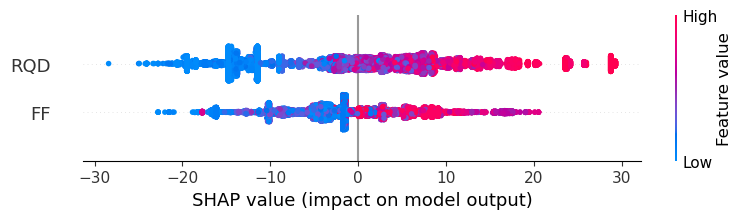

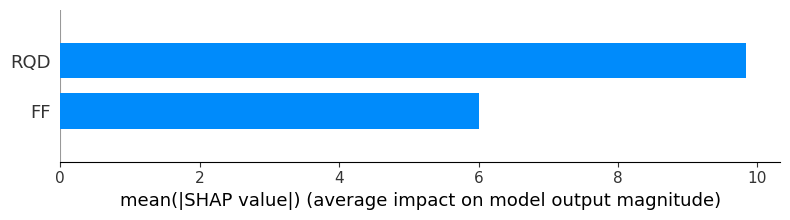

Mean SHAP Values: [-1.05867544  0.96216774]


In [25]:
# Create a Gradient Boosting Regressor
gbm_reg = GradientBoostingRegressor(random_state=42,learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.8)
# Fit the model to the training set
gbm_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = gbm_reg.predict(X_train)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_test)
print(f'Standard Deviation: {round(std_dev, 2)}')
# Use the best model for predictions
y_pred_test = gbm_reg.predict(X_test)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_test)
print(f'Standard Deviation: {round(std_dev, 2)}')
# SHAP values
explainer = shap.Explainer(gbm_reg)
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.show()
# Bar plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", show=False)
plt.show()
# Mean SHAP values
mean_shap_values = shap_values.mean(axis=0)
print('Mean SHAP Values:', mean_shap_values)

In [26]:
# SHAP values
explainer = shap.Explainer(gbm_reg)
shap_values = explainer.shap_values(X_train)
# Create a DataFrame to store feature contributions for each training instance
feature_contributions_train_df = pd.DataFrame(shap_values, columns=X_train.columns)
# Display feature contributions for all training instances
print("Feature contributions for all training instances:")
print(feature_contributions_train_df)
# Save feature contributions to CSV file
feature_contributions_train_df.to_csv("FeatureContributionsInstancesTrain.csv", index=False)

Feature contributions for all training instances:
              FF        RQD
0      -7.206255  -5.291015
1     -16.644662 -18.483366
2      -4.486052   0.667809
3      -3.730986   7.622307
4      12.155891  11.405152
...          ...        ...
52192   3.566836   4.784441
52193  -1.323807  14.346228
52194  -3.802384  14.307596
52195  -7.941773   2.792650
52196   6.229512  -7.563907

[52197 rows x 2 columns]


In [27]:
# SHAP values
explainer = shap.Explainer(gbm_reg)
shap_values = explainer.shap_values(X_test)
# Create a DataFrame to store feature contributions for each training instance
feature_contributions_train_df = pd.DataFrame(shap_values, columns=X_test.columns)
# Display feature contributions for all training instances
print("Feature contributions for all training instances:")
print(feature_contributions_train_df)
# Save feature contributions to CSV file
feature_contributions_train_df.to_csv("FeatureContributionsInstancesTest.csv", index=False)

Feature contributions for all training instances:
              FF        RQD
0       4.449146   5.771888
1      -1.744315 -11.459634
2       5.308159  -4.116465
3     -16.644662 -18.483366
4      -1.744315 -11.459634
...          ...        ...
13045   3.544975  10.018541
13046 -11.286599 -14.711064
13047  -3.281320   8.527269
13048   0.606879 -15.865427
13049  -5.189845   6.692884

[13050 rows x 2 columns]


In [45]:
# Calculate the mean squared error
mse = np.mean((y_train - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_train, y_pred):
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100
mape = calculate_mape(y_train, y_pred.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred, y_train):
    rmse = np.sqrt(np.mean((y_pred.flatten() - y_train)**2))
    target_range = np.max(y_train) - np.min(y_train)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred, y_train)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('GBRTrain.xlsx', index=False)

Mean Squared Error (MSE): 9.94
Root Mean Squared Error: 3.15
Mean Absolute Error (MAE): 1.86
Mean Absolute Percentage Error (MAPE): 3.95%
Root Mean Squared Error (RMSE): 3.15
Relative Root Mean Squared Error (RRMSE): 0.04
R-squared (R²): 0.96
Correlation coefficient for feature: 0.98
Standard Deviation: 14.62
Performance Index (Pi): 0.02


In [46]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_train, 'Predicted_Target': y_pred})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/GBRPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: GBRPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: GBRPred_vs_actual.csv


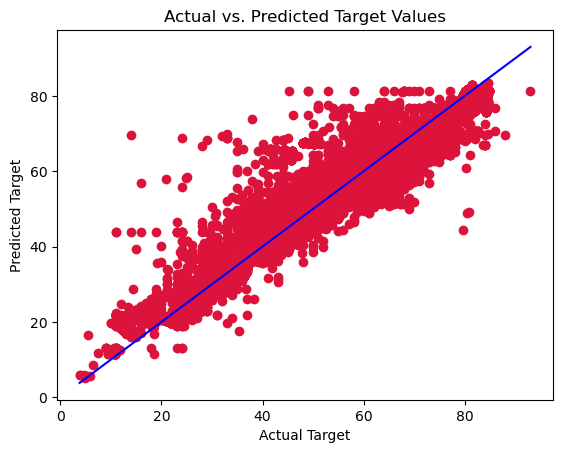

In [47]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [48]:
# Calculate the mean squared error
mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_test, y_pred_test):
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mape = calculate_mape(y_test, y_pred_test.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred_test, y_test):
    rmse = np.sqrt(np.mean((y_pred_test.flatten() - y_test)**2))
    target_range = np.max(y_test) - np.min(y_test)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred_test, y_test)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred_test)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('GBRTest.xlsx', index=False)

Mean Squared Error (MSE): 12.09
Root Mean Squared Error: 3.48
Mean Absolute Error (MAE): 1.99
Mean Absolute Percentage Error (MAPE): 4.19%
Root Mean Squared Error (RMSE): 3.48
Relative Root Mean Squared Error (RRMSE): 0.04
R-squared (R²): 0.95
Correlation coefficient for feature: 0.97
Standard Deviation: 14.60
Performance Index (Pi): 0.02


In [49]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_test, 'Predicted_Target': y_pred_test})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/GBRTestPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: GBRTestPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: GBRTestPred_vs_actual.csv


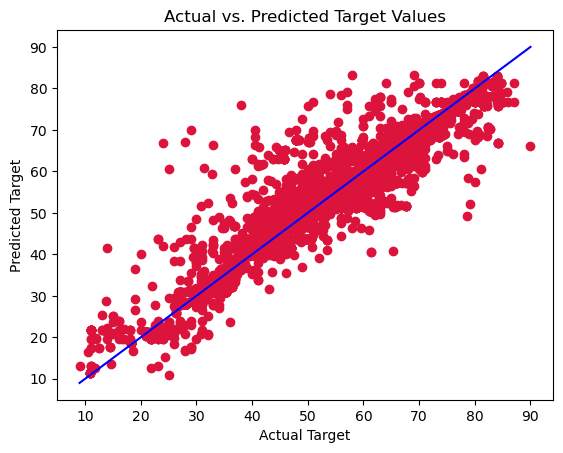

In [50]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test, c='crimson')
p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [51]:
# Load new or unknown data for prediction
VDdata = pd.read_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/AIO_Validation.csv")  # Replace with the path to your new data file
# Prepare the new data
VDX = VDdata.iloc[:, 0:2]  # Assuming the same number of features as in the training data
yD = VDdata.iloc[:, 2] 
# Predict using the trained model
YpredVD = gbm_reg.predict(VDX)
# Calculate RMR89 using the formula: RMR89 = GSI_pred + 5
RMR89 = YpredVD + 5
# Calculate QS using the formula: QS = EXP((RMR89 - 44) / 9)
QS = [math.exp((val - 44) / 9) for val in RMR89]
# Add the calculated values and predicted GSI to the dataframe
VDdata['Predicted_GSI'] = YpredVD
VDdata['RMR89'] = RMR89
VDdata['QS'] = QS
# Save the updated dataframe to a new CSV file
VDdata.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/GBR_ValidationKoBold.csv", index=False)
# Print or use the updated dataframe as needed
#print("Updated dataframe with Predicted GSI, RMR89, and QS values:")
#print(VDdata)

In [52]:
# Calculate the mean squared error
mse = np.mean((yD - YpredVD) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yD, YpredVD)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(yD, YpredVD):
    return np.mean(np.abs((yD - YpredVD) / yD)) * 100
mape = calculate_mape(yD, YpredVD.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(yD, YpredVD))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(YpredVD, yD):
    rmse = np.sqrt(np.mean((YpredVD - yD)**2))
    target_range = np.max(yD) - np.min(yD)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(YpredVD, yD)
print(f"Relative RMSE: {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(yD, YpredVD)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(yD, YpredVD, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
    #Calculate standard deviations for each column of y
STD = np.std(YpredVD)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.4f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Validate_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Validate_df.to_excel('GBRValidation.xlsx', index=False)

Mean Squared Error (MSE): 12.2228
Mean Absolute Error (MAE): 2.3296
Mean Absolute Percentage Error (MAPE): 4.08%
Root Mean Squared Error (RMSE): 3.4961
Relative RMSE: 0.08
R-squared (R²): 0.82
Correlation coefficient for feature: 0.91
Standard Deviation: 7.9783
Performance Index (Pi): 0.04


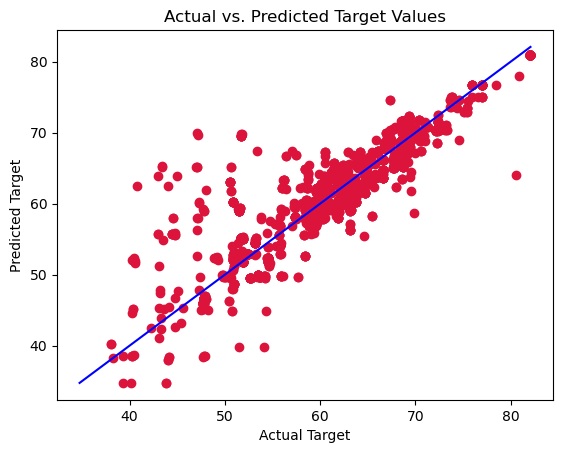

In [53]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(yD, YpredVD, c='crimson')
p1 = max(max(YpredVD), max(yD))
p2 = min(min(YpredVD), min(yD))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

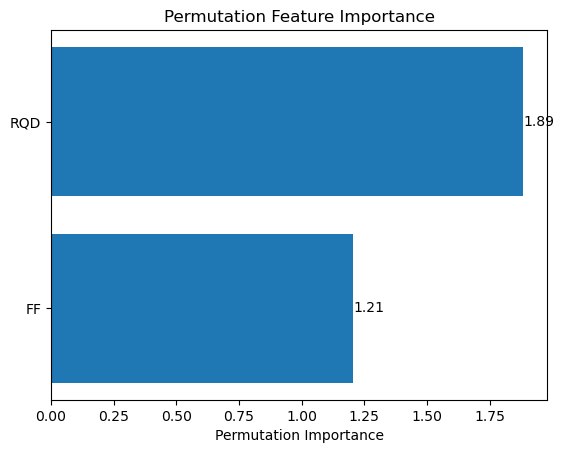

In [54]:
from sklearn.inspection import permutation_importance
# Calculate permutation feature importance
result = permutation_importance(gbm_reg, X_test, y_test, n_repeats=30, random_state=42)
# Get the feature importances
importances = result.importances_mean
# Sort features based on importance
sorted_idx = importances.argsort()
# Plot feature importances
plt.barh(range(X_test.shape[1]), importances[sorted_idx], align="center")
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
# Label each bar with its maximum importance value rounded to two decimal places
for i, val in zip(range(X_test.shape[1]), importances[sorted_idx]):
    plt.text(val, i, f'{val:.2f}', ha='left', va='center')
plt.show()

In [55]:
from sklearn.tree import DecisionTreeRegressor

Correlation coefficient for feature: 0.98
Standard Deviation: 15.14
Correlation coefficient for feature: 0.97
Standard Deviation: 15.08


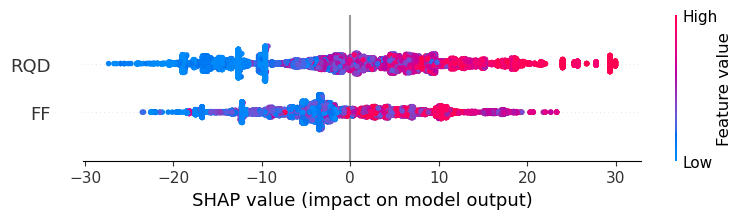

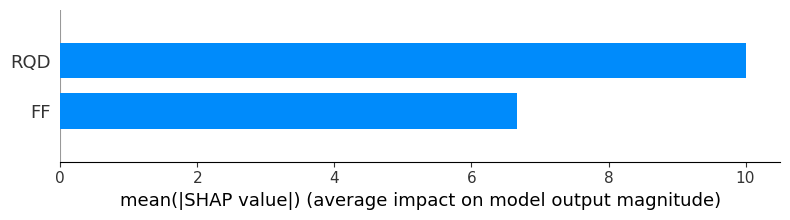

Mean SHAP Values: [-1.2670431   1.18494687]


In [56]:
# Create a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42,max_depth=None, min_samples_leaf=1, min_samples_split=2)
# Fit the model to the training set
dt_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = dt_reg.predict(X_train)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_train)
print(f'Standard Deviation: {round(std_dev, 2)}')
# Use the best model for predictions
y_pred_test = dt_reg.predict(X_test)
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {round(coefficient, 2)}")
# Standard Deviation
std_dev = np.std(y_test)
print(f'Standard Deviation: {round(std_dev, 2)}')
# SHAP values
explainer = shap.Explainer(dt_reg)
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.show()
# Bar plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", show=False)
plt.show()
# Mean SHAP values
mean_shap_values = shap_values.mean(axis=0)
print('Mean SHAP Values:', mean_shap_values)

In [57]:
# Calculate the mean squared error
mse = np.mean((y_train - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_train, y_pred):
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100
mape = calculate_mape(y_train, y_pred.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred, y_train):
    rmse = np.sqrt(np.mean((y_pred.flatten() - y_train)**2))
    target_range = np.max(y_train) - np.min(y_train)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred, y_train)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('DTRTrain.xlsx', index=False)

Mean Squared Error (MSE): 8.18
Root Mean Squared Error: 2.86
Mean Absolute Error (MAE): 1.45
Mean Absolute Percentage Error (MAPE): 3.12%
Root Mean Squared Error (RMSE): 2.86
Relative Root Mean Squared Error (RRMSE): 0.03
R-squared (R²): 0.96
Correlation coefficient for feature: 0.98
Standard Deviation: 14.87
Performance Index (Pi): 0.02


In [58]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_train, 'Predicted_Target': y_pred})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/DTRPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: DTRPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: DTRPred_vs_actual.csv


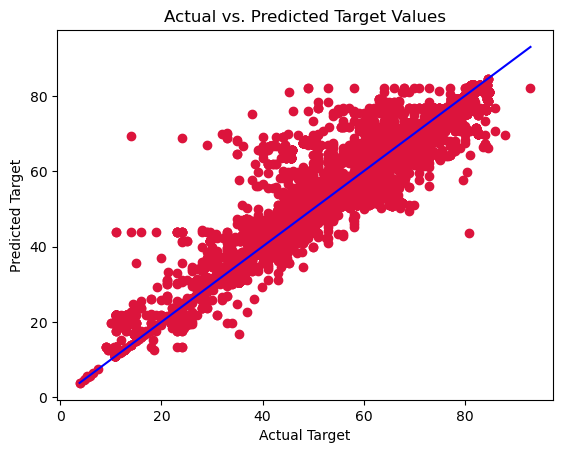

In [59]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [60]:
# Calculate the mean squared error
mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_test, y_pred_test):
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mape = calculate_mape(y_test, y_pred_test.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred_test, y_test):
    rmse = np.sqrt(np.mean((y_pred_test.flatten() - y_test)**2))
    target_range = np.max(y_test) - np.min(y_test)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred_test, y_test)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred_test)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('DTRTest.xlsx', index=False)

Mean Squared Error (MSE): 13.02
Root Mean Squared Error: 3.61
Mean Absolute Error (MAE): 1.75
Mean Absolute Percentage Error (MAPE): 3.75%
Root Mean Squared Error (RMSE): 3.61
Relative Root Mean Squared Error (RRMSE): 0.04
R-squared (R²): 0.94
Correlation coefficient for feature: 0.97
Standard Deviation: 14.86
Performance Index (Pi): 0.02


In [61]:
# Create a DataFrame to store both actual and predicted values
combined_df = pd.DataFrame({'Actual_Target': y_test, 'Predicted_Target': y_pred_test})
# Save the combined DataFrame to a CSV file
combined_df.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/DTRTestPred_vs_actual.csv", index=False)
print("Combined actual and predicted values saved to CSV: DTRTestPred_vs_actual.csv")

Combined actual and predicted values saved to CSV: DTRTestPred_vs_actual.csv


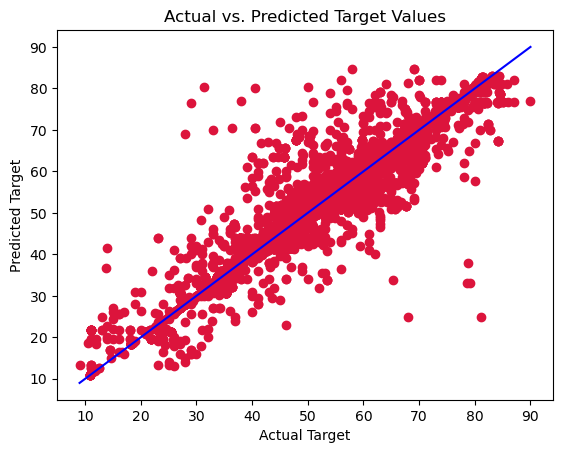

In [62]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test, c='crimson')
p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [63]:
# Load new or unknown data for prediction
VDdata = pd.read_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/AIO_Validation.csv")  # Replace with the path to your new data file
# Prepare the new data
VDX = VDdata.iloc[:, 0:2]  # Assuming the same number of features as in the training data
yD = VDdata.iloc[:, 2] 
# Predict using the trained model
YpredVD = dt_reg.predict(VDX)
# Calculate RMR89 using the formula: RMR89 = GSI_pred + 5
RMR89 = YpredVD + 5
# Calculate QS using the formula: QS = EXP((RMR89 - 44) / 9)
QS = [math.exp((val - 44) / 9) for val in RMR89]
# Add the calculated values and predicted GSI to the dataframe
VDdata['Predicted_GSI'] = YpredVD
VDdata['RMR89'] = RMR89
VDdata['QS'] = QS
# Save the updated dataframe to a new CSV file
VDdata.to_csv("C:/Users/UOM-SEU/Desktop/GTE-ML/DTR_ValidationKoBold.csv", index=False)
# Print or use the updated dataframe as needed
#print("Updated dataframe with Predicted GSI, RMR89, and QS values:")
#print(VDdata)

In [64]:
# Calculate the mean squared error
mse = np.mean((yD - YpredVD) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yD, YpredVD)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(yD, YpredVD):
    return np.mean(np.abs((yD - YpredVD) / yD)) * 100
mape = calculate_mape(yD, YpredVD.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(yD, YpredVD))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(YpredVD, yD):
    rmse = np.sqrt(np.mean((YpredVD - yD)**2))
    target_range = np.max(yD) - np.min(yD)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(YpredVD, yD)
print(f"Relative RMSE: {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(yD, YpredVD)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(yD, YpredVD, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
    #Calculate standard deviations for each column of y
STD = np.std(YpredVD)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.4f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Validate_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Validate_df.to_excel('DTRValidation.xlsx', index=False)

Mean Squared Error (MSE): 69.0448
Mean Absolute Error (MAE): 5.5802
Mean Absolute Percentage Error (MAPE): 9.82%
Root Mean Squared Error (RMSE): 8.3093
Relative RMSE: 0.19
R-squared (R²): -0.00
Correlation coefficient for feature: 0.74
Standard Deviation: 12.1330
Performance Index (Pi): 0.11


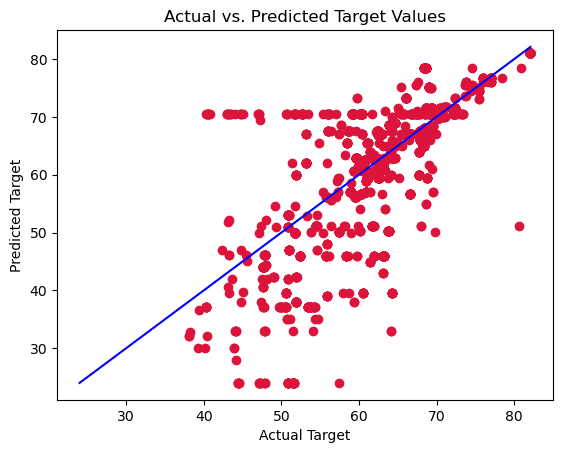

In [65]:
# Create a dataframe for y_train vs y_pred
# Scatter plot of actual vs. predicted values
plt.scatter(yD, YpredVD, c='crimson')
p1 = max(max(YpredVD), max(yD))
p2 = min(min(YpredVD), min(yD))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

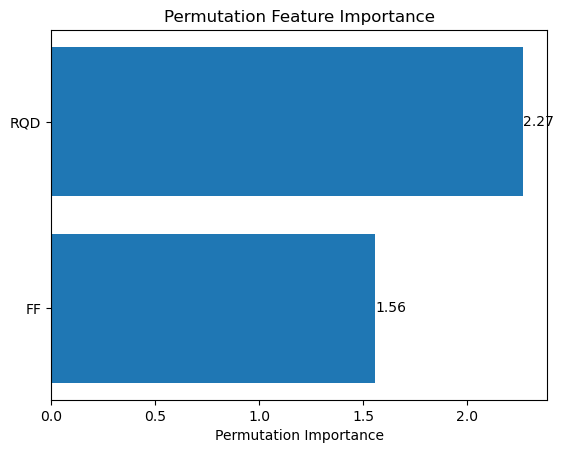

In [66]:
from sklearn.inspection import permutation_importance
# Calculate permutation feature importance
result = permutation_importance(dt_reg, X_test, y_test, n_repeats=30, random_state=42)
# Get the feature importances
importances = result.importances_mean
# Sort features based on importance
sorted_idx = importances.argsort()
# Plot feature importances
plt.barh(range(X_test.shape[1]), importances[sorted_idx], align="center")
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
# Label each bar with its maximum importance value rounded to two decimal places
for i, val in zip(range(X_test.shape[1]), importances[sorted_idx]):
    plt.text(val, i, f'{val:.2f}', ha='left', va='center')
plt.show()

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Build the model with the provided hyperparameters
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)))
# Best hyperparameters
num_layers = 6
units = [128, 416, 352, 352, 448, 256, 160]
for i in range(num_layers):
    model.add(tf.keras.layers.Dense(units[i], activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))  # Output layer for regression
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model and collect the history for plotting
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))
# Evaluate the model on the training set
y_pred = model.predict(X_train_scaled).flatten()
# Evaluate the model on the testing set
y_pred_test = model.predict(X_test_scaled).flatten()

Epoch 1/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 263.6135 - val_loss: 69.8240
Epoch 2/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 67.6775 - val_loss: 55.7568
Epoch 3/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 56.2804 - val_loss: 50.6782
Epoch 4/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 48.7911 - val_loss: 42.5851
Epoch 5/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 43.9995 - val_loss: 39.6721
Epoch 6/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40.6910 - val_loss: 41.2759
Epoch 7/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 39.3631 - val_loss: 34.4945
Epoch 8/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 37.6156 - val_loss: 35.1522
Epoch 9/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 36.7829 - val_loss: 35.1918
Epoch 10/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 37.1548 - val_loss: 32.8528
Epoch 11/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 35.6979 - val_loss: 38.8

1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.2534 - val_loss: 21.4341
Epoch 67/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17.5275 - val_loss: 23.9327
Epoch 68/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17.2717 - val_loss: 23.4594
Epoch 69/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.1006 - val_loss: 19.1454
Epoch 70/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.4005 - val_loss: 18.5171
Epoch 71/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.7468 - val_loss: 17.6851
Epoch 72/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.3025 - val_loss: 21.6658
Epoch 73/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19.1926 - val_loss: 17.1886
Epoch 74/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.2300 - val_loss: 24.0466
Epoch 75/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.2621 - val_loss: 21.9510
Epoch 76/100
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.5120 - val_loss: 21.4386
E

In [69]:
# Calculate the mean squared error
mse = np.mean((y_train - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_train, y_pred):
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100
mape = calculate_mape(y_train, y_pred.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred, y_train):
    rmse = np.sqrt(np.mean((y_pred.flatten() - y_train)**2))
    target_range = np.max(y_train) - np.min(y_train)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred, y_train)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_train, y_pred, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('MLPNTrain.xlsx', index=False)

Mean Squared Error (MSE): 14.84
Root Mean Squared Error: 3.85
Mean Absolute Error (MAE): 2.47
Mean Absolute Percentage Error (MAPE): 5.02%
Root Mean Squared Error (RMSE): 3.85
Relative Root Mean Squared Error (RRMSE): 0.04
R-squared (R²): 0.94
Correlation coefficient for feature: 0.97
Standard Deviation: 14.58
Performance Index (Pi): 0.02


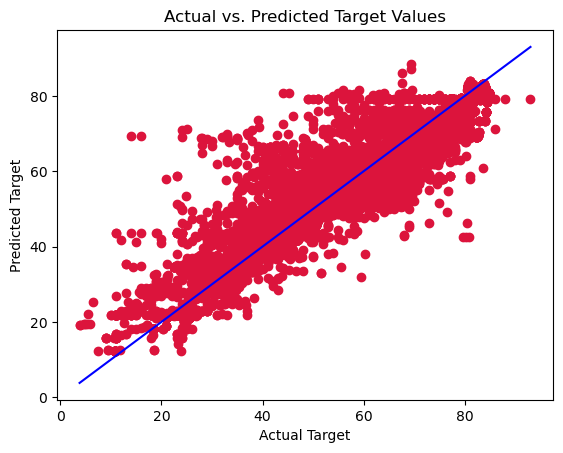

In [70]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

In [71]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred.flatten()})
# Save the results DataFrame to a CSV file
results_df.to_csv('GSIpredictedMLP_vs_actual.csv', index=False)

In [72]:
# Calculate the mean squared error
mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_test, y_pred_test):
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mape = calculate_mape(y_test, y_pred_test.flatten())
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#Relative root mean squared error(RRMSE)
def relative_rmse(y_pred_test, y_test):
    rmse = np.sqrt(np.mean((y_pred_test.flatten() - y_test)**2))
    target_range = np.max(y_test) - np.min(y_test)
    rrmse = rmse / target_range
    return rrmse
#Relative root mean squared error(RRMSE)
rrmse = relative_rmse(y_pred_test, y_test)
print(f"Relative Root Mean Squared Error (RRMSE): {rrmse:.2f}")
# Calculate Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R²): {r2:.2f}")
# Calculate the correlation coefficients between each feature and the target
correlation_coefficients = np.corrcoef(y_test, y_pred_test, rowvar=False)[:-1, -1]
# Print correlation coefficients for each feature
for idx, coefficient in enumerate(correlation_coefficients):
    print(f"Correlation coefficient for feature: {coefficient:.2f}")
#Calculate standard deviations for each column of y
STD = np.std(y_pred_test)
#Print standard deviations for each column
print(f"Standard Deviation: {STD:.2f}")
# Calculate Performance Index (Pi)
pi = rrmse / (1 + coefficient)
# Print the Performance Index
print(f"Performance Index (Pi): {pi:.2f}")
# Create a new DataFrame to store the evaluation metrics
Train_df = pd.DataFrame({'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE','RRMSE', 'R²','coefficient','STD','PI'],
                              'Value': [mse, mae, mape, rmse,rrmse, r2,coefficient,STD,pi]})
# Save the evaluation metrics to an Excel file
Train_df.to_excel('MLPNTest.xlsx', index=False)

Mean Squared Error (MSE): 16.12
Root Mean Squared Error: 4.01
Mean Absolute Error (MAE): 2.55
Mean Absolute Percentage Error (MAPE): 5.08%
Root Mean Squared Error (RMSE): 4.01
Relative Root Mean Squared Error (RRMSE): 0.05
R-squared (R²): 0.93
Correlation coefficient for feature: 0.96
Standard Deviation: 14.57
Performance Index (Pi): 0.03


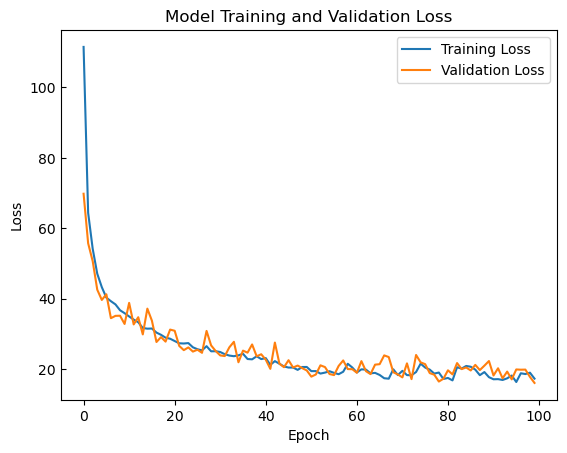

In [73]:
# Plot training and validation loss per epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tick_params(axis='y', direction='in')  # Set y-axis ticks inside the plot
plt.show()

In [74]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test.flatten()})
# Save the results DataFrame to a CSV file
results_df.to_csv('GSITestMLP_vs_actual.csv', index=False)

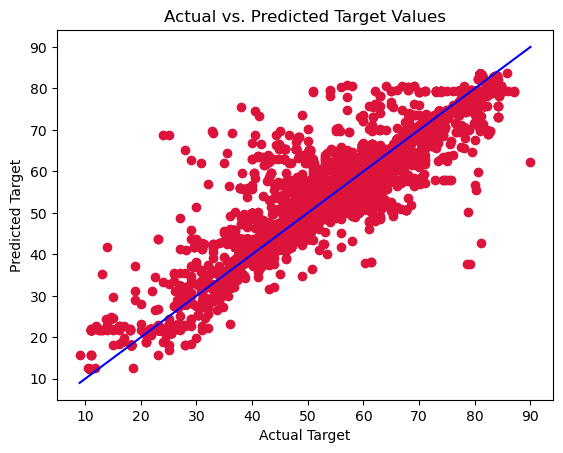

In [75]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test, c='crimson')
p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Target Values')
plt.show()

408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


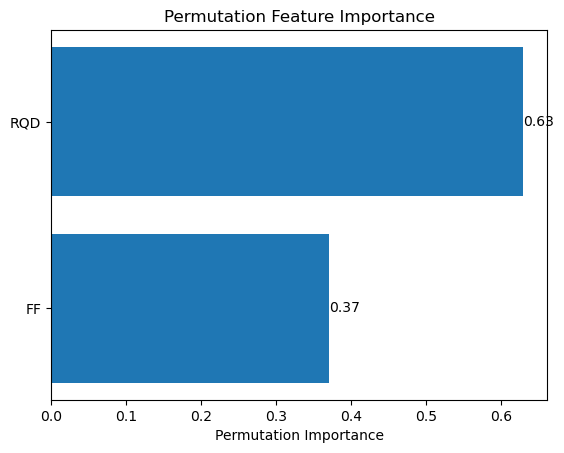

In [76]:
from sklearn.inspection import permutation_importance
# Calculate baseline mean squared error
baseline_mse = mean_squared_error(y_test, y_pred_test)
# Initialize an array to store feature importances
feature_importances = np.zeros(X_test_scaled.shape[1])
# Permute feature values and calculate mean squared error for each feature
for i in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, i])  # permute the i-th feature
    y_pred_permuted = model.predict(X_test_permuted).flatten()
    permuted_mse = mean_squared_error(y_test, y_pred_permuted)
    feature_importances[i] = baseline_mse - permuted_mse
# Normalize feature importances
feature_importances /= feature_importances.sum()
# Sort features based on importance
sorted_idx = feature_importances.argsort()
# Plot feature importances
plt.barh(range(X_test_scaled.shape[1]), feature_importances[sorted_idx], align="center")
plt.yticks(range(X_test_scaled.shape[1]), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
# Label each bar with its maximum importance value rounded to two decimal places
for i, val in zip(range(X_test_scaled.shape[1]), feature_importances[sorted_idx]):
    plt.text(val, i, f'{val:.2f}', ha='left', va='center')
plt.show()